# Laplace filter

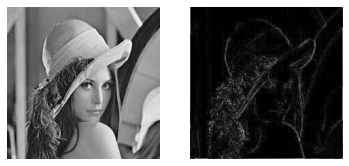

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def laplace_filter(image):
    kernel_size = 3
    height, width = image.shape
    padding_size = int((kernel_size - 1) / 2)
    template = np.array([[1, 1, 1],
                         [1, -8, 1],
                         [1, 1, 1]])

    padded_img = np.pad(image, padding_size, 'constant')
    edge_of_img = np.zeros_like(image, dtype=float)

    for i in range(height):
        for j in range(width):
            corr = padded_img[i:i + kernel_size, j:j + kernel_size]
            edge_of_img[i, j] = np.abs(np.sum(template * corr))

    return edge_of_img


def process():
    src = np.array(Image.open("/content/lena.jpg").convert("L"))
    edge = laplace_filter(src)

    plt.subplot(1, 2, 1)
    plt.imshow(src, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(edge, cmap='gray')
    plt.axis("off")
    plt.show()


if __name__ == '__main__':
    process()